# Assignment 3

Lucas Bezerra, ID: 171412, lucas.camaradantasbezerra@kaust.edu.sa

### Problem 1: Recurrent Neural Network

<strong>a. (10 points) LSTM contains a forget gate to decide how many previous
information need to be kept. There is a Sigmoid activation in the forget gate.
Explain why we use Sigmoid here, instead of Tanh.</strong>

Both the sigmoid $\sigma(x)$ and hyperbolic tangent $\text{tanh}(x)$ functions have 2 horizontal asymptotes as $x\to\pm\infty$. However, as $x\to -\infty$, $\sigma(x)\to 0$ while $\text{tanh}(x)\to -1$. Forgetting information is equivalent to multiplying it by zero, and as the sigmoid function has a larger domain that maps to zero than tanh, it is more fit for the forget gate.

<strong>b. (10 points) In neural language processing and many other fields that
process sequential data, more and more LSTM-based models are replaced by
Transformer-based models [2] nowadays. Why LSTM is not as popular as before
now? List at least 2 drawbacks of LSTM-compared to Transformer. Explain
each of them with 1 to 3 sentences.</strong>

- LSTMs tend to attend more to recent samples and forget older ones, while a transformer computes the attention between all pairs of samples equally, no matter how further apart they are. This allows transformers to have better performance for longer sequences.
- Transformers are highly-parallelizable, since they rely mostly on matrix multiplications, an operation that is implemented very efficiently in specialized hardware (e.g. GPUs), while LSTMs process sequences in a sequential fashion.

### Problem 2: DCGAN

<strong>In this coding assignment, you need to implement the discriminator of the DCGAN (and maybe tune some hyperparameters
 like the learning rates and the number of epochs)
to make your model generates some MNIST numbers. You can find a basic draft of the discriminator in the model.py
file. Fill the draft and train the model.</strong>

In [1]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torch.utils.data as data_utils
from torchvision.datasets.mnist import MNIST

from model import Generator, Discriminator
from train import train_DCGAN

device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")

Hyperparameters are listed here. You maybe need to play a little bit with.

In [2]:
g_lr = 0.002
d_lr = 0.0002
batch_size = 128
num_epochs = 10

In [3]:
trans = transforms.Compose([
            transforms.Scale(32),
            transforms.ToTensor(),
            transforms.Normalize((0.5, ), (0.5, )),
        ])

train_set = MNIST(root='.', train=True, transform=trans, download=True)
train_loader = data_utils.DataLoader(train_set, batch_size=batch_size, shuffle=True)


/home/camaral/miniconda3/envs/gan_course/lib/python3.9/site-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


[0/10][0/469]	Loss_D: 1.5009	Loss_G: 1.9007	D(x): 0.5158	D(G(z)): 0.5525 / 0.1593
[0/10][50/469]	Loss_D: 0.0796	Loss_G: 8.0136	D(x): 0.9829	D(G(z)): 0.0579 / 0.0004
[0/10][100/469]	Loss_D: 0.6047	Loss_G: 2.3470	D(x): 0.6821	D(G(z)): 0.1137 / 0.1248
[0/10][150/469]	Loss_D: 0.9343	Loss_G: 2.0685	D(x): 0.7358	D(G(z)): 0.4057 / 0.1500
[0/10][200/469]	Loss_D: 1.0575	Loss_G: 2.1510	D(x): 0.8123	D(G(z)): 0.5336 / 0.1429
[0/10][250/469]	Loss_D: 0.9357	Loss_G: 1.4722	D(x): 0.5795	D(G(z)): 0.2815 / 0.2533
[0/10][300/469]	Loss_D: 0.8736	Loss_G: 2.2080	D(x): 0.7720	D(G(z)): 0.4396 / 0.1245
[0/10][350/469]	Loss_D: 0.9737	Loss_G: 1.3411	D(x): 0.6678	D(G(z)): 0.4001 / 0.2885
[0/10][400/469]	Loss_D: 1.0909	Loss_G: 1.0703	D(x): 0.5038	D(G(z)): 0.3007 / 0.3581
[0/10][450/469]	Loss_D: 1.3597	Loss_G: 0.8031	D(x): 0.3185	D(G(z)): 0.1017 / 0.4752


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


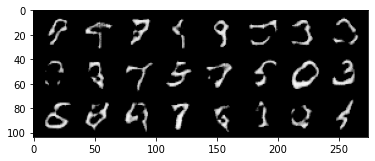

[1/10][0/469]	Loss_D: 0.8512	Loss_G: 1.6902	D(x): 0.6655	D(G(z)): 0.3377 / 0.2000
[1/10][50/469]	Loss_D: 0.8129	Loss_G: 1.5207	D(x): 0.6446	D(G(z)): 0.2910 / 0.2357
[1/10][100/469]	Loss_D: 0.8947	Loss_G: 2.0124	D(x): 0.7142	D(G(z)): 0.3981 / 0.1507
[1/10][150/469]	Loss_D: 1.1021	Loss_G: 2.1529	D(x): 0.8481	D(G(z)): 0.5800 / 0.1347
[1/10][200/469]	Loss_D: 1.1515	Loss_G: 2.4975	D(x): 0.9052	D(G(z)): 0.6314 / 0.1028
[1/10][250/469]	Loss_D: 0.8934	Loss_G: 0.9160	D(x): 0.5014	D(G(z)): 0.1328 / 0.4322
[1/10][300/469]	Loss_D: 1.0118	Loss_G: 1.5116	D(x): 0.6892	D(G(z)): 0.4366 / 0.2488
[1/10][350/469]	Loss_D: 0.8057	Loss_G: 1.2553	D(x): 0.6343	D(G(z)): 0.2635 / 0.3105
[1/10][400/469]	Loss_D: 0.6928	Loss_G: 1.5656	D(x): 0.7694	D(G(z)): 0.3239 / 0.2375
[1/10][450/469]	Loss_D: 0.9704	Loss_G: 4.6495	D(x): 0.9439	D(G(z)): 0.5639 / 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


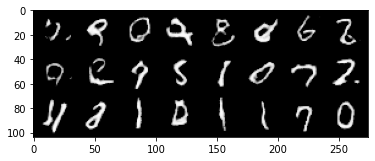

[2/10][0/469]	Loss_D: 0.9703	Loss_G: 1.0268	D(x): 0.4559	D(G(z)): 0.1114 / 0.3938
[2/10][50/469]	Loss_D: 1.3192	Loss_G: 3.4252	D(x): 0.9583	D(G(z)): 0.6789 / 0.0432
[2/10][100/469]	Loss_D: 0.6828	Loss_G: 3.5453	D(x): 0.8960	D(G(z)): 0.4090 / 0.0387
[2/10][150/469]	Loss_D: 0.4599	Loss_G: 1.6465	D(x): 0.6881	D(G(z)): 0.0608 / 0.2257
[2/10][200/469]	Loss_D: 0.3447	Loss_G: 3.5889	D(x): 0.9312	D(G(z)): 0.2283 / 0.0390
[2/10][250/469]	Loss_D: 0.3558	Loss_G: 3.0160	D(x): 0.8696	D(G(z)): 0.1807 / 0.0684
[2/10][300/469]	Loss_D: 0.6920	Loss_G: 1.9463	D(x): 0.7641	D(G(z)): 0.3169 / 0.1721
[2/10][350/469]	Loss_D: 0.1189	Loss_G: 2.7758	D(x): 0.9428	D(G(z)): 0.0564 / 0.0957
[2/10][400/469]	Loss_D: 1.7704	Loss_G: 4.5267	D(x): 0.9787	D(G(z)): 0.7804 / 0.0181
[2/10][450/469]	Loss_D: 0.6091	Loss_G: 1.7245	D(x): 0.7227	D(G(z)): 0.2117 / 0.2134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


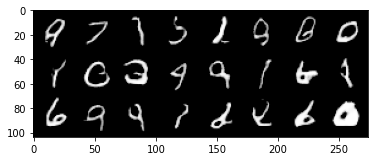

[3/10][0/469]	Loss_D: 0.1933	Loss_G: 3.2556	D(x): 0.8984	D(G(z)): 0.0767 / 0.0518
[3/10][50/469]	Loss_D: 0.0935	Loss_G: 2.8144	D(x): 0.9415	D(G(z)): 0.0306 / 0.0826
[3/10][100/469]	Loss_D: 0.0669	Loss_G: 4.2570	D(x): 0.9828	D(G(z)): 0.0474 / 0.0202
[3/10][150/469]	Loss_D: 1.0103	Loss_G: 1.1396	D(x): 0.5851	D(G(z)): 0.3361 / 0.3512
[3/10][200/469]	Loss_D: 0.8369	Loss_G: 1.1238	D(x): 0.6029	D(G(z)): 0.2349 / 0.3587
[3/10][250/469]	Loss_D: 0.8387	Loss_G: 0.6770	D(x): 0.5242	D(G(z)): 0.1158 / 0.5370
[3/10][300/469]	Loss_D: 0.8589	Loss_G: 0.8787	D(x): 0.4957	D(G(z)): 0.0885 / 0.4473
[3/10][350/469]	Loss_D: 0.7218	Loss_G: 1.8239	D(x): 0.6084	D(G(z)): 0.1528 / 0.2067
[3/10][400/469]	Loss_D: 0.1223	Loss_G: 3.7476	D(x): 0.9199	D(G(z)): 0.0362 / 0.0323
[3/10][450/469]	Loss_D: 0.0607	Loss_G: 3.9490	D(x): 0.9809	D(G(z)): 0.0399 / 0.0264


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


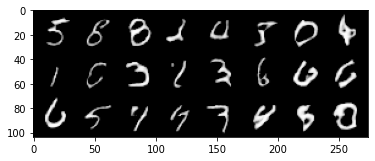

[4/10][0/469]	Loss_D: 0.2739	Loss_G: 3.9650	D(x): 0.7958	D(G(z)): 0.0288 / 0.0266
[4/10][50/469]	Loss_D: 0.1231	Loss_G: 3.1555	D(x): 0.9250	D(G(z)): 0.0424 / 0.0584
[4/10][100/469]	Loss_D: 0.0709	Loss_G: 3.8163	D(x): 0.9520	D(G(z)): 0.0206 / 0.0318
[4/10][150/469]	Loss_D: 0.0640	Loss_G: 3.1942	D(x): 0.9599	D(G(z)): 0.0214 / 0.0598
[4/10][200/469]	Loss_D: 0.0509	Loss_G: 4.4590	D(x): 0.9624	D(G(z)): 0.0117 / 0.0177
[4/10][250/469]	Loss_D: 2.2357	Loss_G: 0.0069	D(x): 0.1804	D(G(z)): 0.1649 / 0.9932
[4/10][300/469]	Loss_D: 0.7758	Loss_G: 1.1908	D(x): 0.6329	D(G(z)): 0.2210 / 0.3499
[4/10][350/469]	Loss_D: 0.6970	Loss_G: 0.8530	D(x): 0.6200	D(G(z)): 0.1356 / 0.4836
[4/10][400/469]	Loss_D: 0.6513	Loss_G: 2.4226	D(x): 0.8480	D(G(z)): 0.3486 / 0.1116
[4/10][450/469]	Loss_D: 0.0904	Loss_G: 3.9228	D(x): 0.9713	D(G(z)): 0.0582 / 0.0265


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


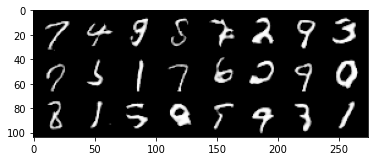

[5/10][0/469]	Loss_D: 0.0858	Loss_G: 3.7910	D(x): 0.9701	D(G(z)): 0.0526 / 0.0296
[5/10][50/469]	Loss_D: 0.0441	Loss_G: 4.2408	D(x): 0.9712	D(G(z)): 0.0145 / 0.0194
[5/10][100/469]	Loss_D: 0.0489	Loss_G: 4.4589	D(x): 0.9833	D(G(z)): 0.0310 / 0.0165
[5/10][150/469]	Loss_D: 0.0386	Loss_G: 4.9804	D(x): 0.9807	D(G(z)): 0.0183 / 0.0100
[5/10][200/469]	Loss_D: 0.0267	Loss_G: 5.1328	D(x): 0.9837	D(G(z)): 0.0100 / 0.0087
[5/10][250/469]	Loss_D: 0.0173	Loss_G: 5.5402	D(x): 0.9891	D(G(z)): 0.0063 / 0.0060
[5/10][300/469]	Loss_D: 0.0308	Loss_G: 5.1092	D(x): 0.9829	D(G(z)): 0.0133 / 0.0094
[5/10][350/469]	Loss_D: 0.6461	Loss_G: 1.0062	D(x): 0.6163	D(G(z)): 0.0929 / 0.4201
[5/10][400/469]	Loss_D: 0.5227	Loss_G: 2.2133	D(x): 0.7498	D(G(z)): 0.1772 / 0.1595
[5/10][450/469]	Loss_D: 0.1389	Loss_G: 3.2336	D(x): 0.9265	D(G(z)): 0.0567 / 0.0569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


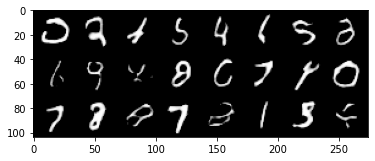

[6/10][0/469]	Loss_D: 0.0540	Loss_G: 4.0347	D(x): 0.9574	D(G(z)): 0.0094 / 0.0279
[6/10][50/469]	Loss_D: 0.0423	Loss_G: 4.4435	D(x): 0.9712	D(G(z)): 0.0127 / 0.0180
[6/10][100/469]	Loss_D: 0.0344	Loss_G: 4.9247	D(x): 0.9841	D(G(z)): 0.0177 / 0.0106
[6/10][150/469]	Loss_D: 0.0389	Loss_G: 5.0200	D(x): 0.9927	D(G(z)): 0.0306 / 0.0116
[6/10][200/469]	Loss_D: 0.0196	Loss_G: 4.6716	D(x): 0.9909	D(G(z)): 0.0102 / 0.0138
[6/10][250/469]	Loss_D: 0.0161	Loss_G: 4.8472	D(x): 0.9920	D(G(z)): 0.0080 / 0.0120
[6/10][300/469]	Loss_D: 0.0170	Loss_G: 5.0306	D(x): 0.9924	D(G(z)): 0.0092 / 0.0108
[6/10][350/469]	Loss_D: 0.0212	Loss_G: 5.8002	D(x): 0.9923	D(G(z)): 0.0132 / 0.0045
[6/10][400/469]	Loss_D: 0.0214	Loss_G: 5.7526	D(x): 0.9827	D(G(z)): 0.0037 / 0.0055
[6/10][450/469]	Loss_D: 0.0128	Loss_G: 5.5799	D(x): 0.9935	D(G(z)): 0.0062 / 0.0058


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


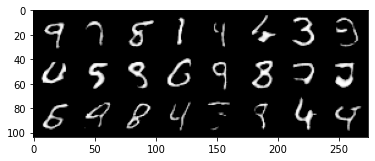

[7/10][0/469]	Loss_D: 0.0204	Loss_G: 5.8243	D(x): 0.9954	D(G(z)): 0.0155 / 0.0046
[7/10][50/469]	Loss_D: 0.0119	Loss_G: 6.5623	D(x): 0.9956	D(G(z)): 0.0074 / 0.0026
[7/10][100/469]	Loss_D: 1.0970	Loss_G: 0.8608	D(x): 0.5221	D(G(z)): 0.2947 / 0.4527
[7/10][150/469]	Loss_D: 0.6543	Loss_G: 1.3920	D(x): 0.7104	D(G(z)): 0.2251 / 0.3154
[7/10][200/469]	Loss_D: 1.3060	Loss_G: 2.9295	D(x): 0.9101	D(G(z)): 0.6683 / 0.0775
[7/10][250/469]	Loss_D: 0.5132	Loss_G: 2.0286	D(x): 0.8086	D(G(z)): 0.2245 / 0.1738
[7/10][300/469]	Loss_D: 0.5707	Loss_G: 2.4987	D(x): 0.7494	D(G(z)): 0.2079 / 0.1135
[7/10][350/469]	Loss_D: 0.7247	Loss_G: 1.3567	D(x): 0.5389	D(G(z)): 0.0286 / 0.3178
[7/10][400/469]	Loss_D: 0.6004	Loss_G: 1.9127	D(x): 0.7319	D(G(z)): 0.1988 / 0.1957
[7/10][450/469]	Loss_D: 0.3975	Loss_G: 1.8307	D(x): 0.7745	D(G(z)): 0.1075 / 0.2190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


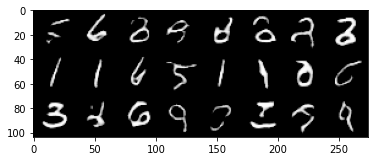

[8/10][0/469]	Loss_D: 0.0639	Loss_G: 3.4724	D(x): 0.9685	D(G(z)): 0.0307 / 0.0435
[8/10][50/469]	Loss_D: 0.0359	Loss_G: 4.5869	D(x): 0.9853	D(G(z)): 0.0206 / 0.0155
[8/10][100/469]	Loss_D: 0.0170	Loss_G: 4.6265	D(x): 0.9928	D(G(z)): 0.0097 / 0.0141
[8/10][150/469]	Loss_D: 0.0184	Loss_G: 5.0807	D(x): 0.9946	D(G(z)): 0.0127 / 0.0093
[8/10][200/469]	Loss_D: 0.0249	Loss_G: 5.1266	D(x): 0.9913	D(G(z)): 0.0159 / 0.0095
[8/10][250/469]	Loss_D: 0.0126	Loss_G: 5.6355	D(x): 0.9917	D(G(z)): 0.0042 / 0.0052
[8/10][300/469]	Loss_D: 0.0146	Loss_G: 6.6882	D(x): 0.9871	D(G(z)): 0.0015 / 0.0020
[8/10][350/469]	Loss_D: 0.0234	Loss_G: 4.8662	D(x): 0.9954	D(G(z)): 0.0184 / 0.0130
[8/10][400/469]	Loss_D: 0.0106	Loss_G: 5.8063	D(x): 0.9939	D(G(z)): 0.0045 / 0.0047
[8/10][450/469]	Loss_D: 0.0139	Loss_G: 6.0047	D(x): 0.9933	D(G(z)): 0.0072 / 0.0040


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


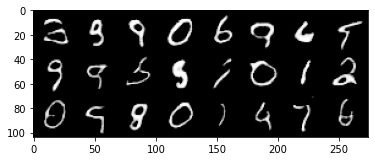

[9/10][0/469]	Loss_D: 0.0106	Loss_G: 5.6464	D(x): 0.9937	D(G(z)): 0.0042 / 0.0055
[9/10][50/469]	Loss_D: 0.0093	Loss_G: 5.3981	D(x): 0.9959	D(G(z)): 0.0051 / 0.0065
[9/10][100/469]	Loss_D: 0.0075	Loss_G: 7.1020	D(x): 0.9935	D(G(z)): 0.0009 / 0.0011
[9/10][150/469]	Loss_D: 0.0262	Loss_G: 6.6329	D(x): 0.9970	D(G(z)): 0.0227 / 0.0024
[9/10][200/469]	Loss_D: 1.4189	Loss_G: 0.7378	D(x): 0.4133	D(G(z)): 0.2691 / 0.5249
[9/10][250/469]	Loss_D: 0.8524	Loss_G: 1.7177	D(x): 0.7992	D(G(z)): 0.4144 / 0.2215
[9/10][300/469]	Loss_D: 0.7442	Loss_G: 1.8380	D(x): 0.7281	D(G(z)): 0.3010 / 0.2012
[9/10][350/469]	Loss_D: 1.0733	Loss_G: 0.4008	D(x): 0.4451	D(G(z)): 0.0773 / 0.7065
[9/10][400/469]	Loss_D: 0.5397	Loss_G: 2.3708	D(x): 0.7472	D(G(z)): 0.1853 / 0.1328
[9/10][450/469]	Loss_D: 0.3794	Loss_G: 2.7260	D(x): 0.8418	D(G(z)): 0.1648 / 0.0940


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


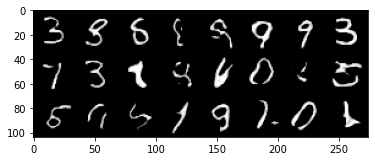

In [4]:
# The training part. Due to the easy dataset and simplified model structure, the training is relatively fast.
# In my case (Single Titan RTX) the training is finished in about 10 minutes.
# You may need to balance the training of generator and discriminator (e.g. by tuning their learning rates) to
# avoid a discriminator that is much stronger than the generator during training


G = Generator().to(device)
D = Discriminator().to(device)

optim_G = torch.optim.Adam(G.parameters(), lr=g_lr, betas=(0.5, 0.999))
optim_D = torch.optim.Adam(D.parameters(), lr=d_lr, betas=(0.5, 0.999))

loss_f = nn.BCELoss()

train_DCGAN(G, D, optim_G, optim_D, loss_f, train_loader, num_epochs, device)

### Problem 3: Mode Collapse

<strong>a. (5 points) Explain the mode collapse problem happens in GANs in 2-3
sentences.</strong></strong>

<!-- The generator loss in a traditional GAN is given by:

$$ L_G(\theta,\phi) = -\mathbb{E}_{z\sim \mathcal{N}(0,I)}\left[ \text{log}(D_\phi(G_\theta(z)))\right]$$ -->

The generator tries to create images that trick the discriminator into thinking they're true. The simplest way to do it is to generate images that cover only part of the domain of real images, not the whole domain, which is known as mode collapse. Since those images are still valid, they trick the generator and thus minimize the loss, but in an unintended way.

<strong>b. (10 points) UnRolled GAN [4] alleviates the mode collapse problem of GAN training by forecasting the future K steps of which networks? Explain your choice in 1-2 sentences. A. Generator B. Discriminator</strong>

<!-- ----------------------------- TO DO -->

Discriminator, as it should be made stronger than the generator from the beginning, since for the generator to learn properly it needs a discriminator that can at least tell real data from fake. The discriminator learns much faster, and thus the generator cannot overfit to a specific discriminator, having to resemble real data as much as it can, and thus avoiding mode collapse.

<strong>c. (10 points) MAD-GAN [5] uses several generators to alleviate the mode collapse problem. Given a fake data, the discriminator needs to recognize the generator that produces it. Why this helps to alleviate the mode collapse problem?</strong>

The intuition behind the use of multiple generators is to encourage each of them to generate images from a single mode. The goal is to encourage "mode collapse" generation-wise, but to collectively cover all the modes of the dataset. 

<strong>d. (15 points) Wasserstein GAN [6, 7] is designed to train the generator by minimizing the Wasserstein distance (AKA earth mover’s distance) between the real data distribution and generated data distribution. WGAN helps stable the training of GAN and alleviate the mode collapse issue. Explain why Wasserstein distance is better than KL/JS divergence when there is no overlap between 2 distributions? How was this notion used to develop the Wasserstein GAN Discriminator D and Generator G losses compared to standard GAN.</strong>



When there is no overlap between distributions, both the KL and JS divergence metrics saturate to their maxima, at which point their gradient is nearly zero. The Wassertein distance, however, does not saturate, and thus works better with gradient descent optimizers. 

Since it is not trivial to compute the Wassertein distance in its original form, the Kantorovich-Rubinstein duality is used to rewrite it as:

$$ W(\mathbb{P}_r, \mathbb{P}_\theta) = \text{sup} \; \mathbb{E}_{x\sim\mathbb{P}_r}\left[ f(x) \right] - \mathbb{E}_{x\sim\mathbb{P}_\theta}\left[ f(x) \right] $$

Where $f(\cdot)$ is a 1-Lipschitz function. In WGANs, $f(\cdot)$ is simply the output of the discriminator, without a softmax, with weight clipping (to ensure the Lipschitz condition). 

The discriminator objective is to maximize the Wassertein distance between the discriminator outputs as functions of real and fake data, meaning it can successfully tell them apart, giving real data higher outputs than fake data. The generator's is to maximize the expected discriminator output given fake data, or to trick the discriminator into thinking they're real ones.